In [150]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [151]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [152]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [153]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [154]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [155]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [156]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [157]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [158]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [159]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [160]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [161]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [162]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

In [163]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

118it [00:33,  3.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


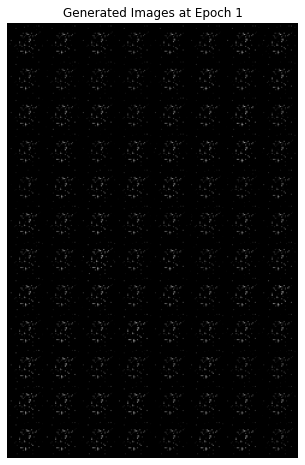

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 1 of 100
Generator loss: 1.41708192, Discriminator loss: 0.87993915


118it [00:35,  3.29it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 2 of 100
Generator loss: 2.00861046, Discriminator loss: 1.26151717


118it [00:39,  3.02it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 3 of 100
Generator loss: 5.26267697, Discriminator loss: 0.56242441


118it [00:37,  3.13it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 4 of 100
Generator loss: 3.01251039, Discriminator loss: 1.00162411


118it [00:37,  3.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


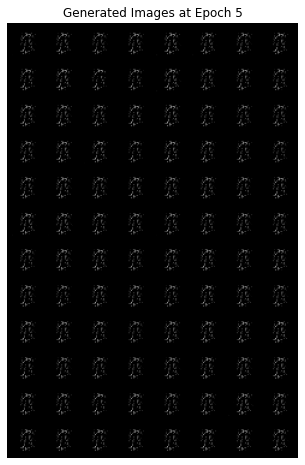

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 5 of 100
Generator loss: 1.59672434, Discriminator loss: 1.01188557


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 6 of 100
Generator loss: 2.39411551, Discriminator loss: 0.86468454


118it [00:38,  3.08it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 7 of 100
Generator loss: 1.69161544, Discriminator loss: 1.16749904


118it [00:38,  3.08it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 8 of 100
Generator loss: 1.27770825, Discriminator loss: 1.18362200


118it [00:37,  3.12it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 9 of 100
Generator loss: 2.59783468, Discriminator loss: 0.91548647


118it [00:38,  3.06it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 10 of 100
Generator loss: 1.10279856, Discriminator loss: 1.25430116


118it [00:38,  3.09it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 11 of 100
Generator loss: 1.67531297, Discriminator loss: 0.84323679


118it [00:38,  3.09it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 12 of 100
Generator loss: 1.47439846, Discriminator loss: 1.08838550


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 13 of 100
Generator loss: 2.90566672, Discriminator loss: 0.97511606


118it [00:37,  3.14it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 14 of 100
Generator loss: 1.29438515, Discriminator loss: 1.13105612


118it [00:37,  3.12it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 15 of 100
Generator loss: 2.15785627, Discriminator loss: 1.05913405


118it [00:39,  2.95it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 16 of 100
Generator loss: 1.36155949, Discriminator loss: 0.90187008


118it [00:41,  2.88it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 17 of 100
Generator loss: 2.05125593, Discriminator loss: 0.72333775


118it [00:37,  3.12it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 18 of 100
Generator loss: 2.12166157, Discriminator loss: 0.78061222


118it [00:38,  3.09it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 19 of 100
Generator loss: 2.27898896, Discriminator loss: 0.75409780


118it [00:38,  3.04it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 20 of 100
Generator loss: 2.46693960, Discriminator loss: 0.77325158


118it [00:43,  2.71it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 21 of 100
Generator loss: 2.31358417, Discriminator loss: 0.72741021


118it [00:37,  3.14it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 22 of 100
Generator loss: 2.58770539, Discriminator loss: 0.59382916


118it [00:41,  2.87it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 23 of 100
Generator loss: 2.91156385, Discriminator loss: 0.52819893


118it [00:37,  3.15it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 24 of 100
Generator loss: 3.00171442, Discriminator loss: 0.55711817


118it [00:37,  3.12it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 25 of 100
Generator loss: 2.54520081, Discriminator loss: 0.66549588


118it [00:37,  3.12it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 26 of 100
Generator loss: 2.35969413, Discriminator loss: 0.55057825


118it [00:38,  3.06it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 27 of 100
Generator loss: 3.07192471, Discriminator loss: 0.47196152


118it [00:40,  2.89it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 28 of 100
Generator loss: 2.55207164, Discriminator loss: 0.69763345


118it [00:41,  2.82it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 29 of 100
Generator loss: 2.68870319, Discriminator loss: 0.59385572


118it [00:47,  2.50it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 30 of 100
Generator loss: 3.05130490, Discriminator loss: 0.47354506


118it [00:38,  3.07it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 31 of 100
Generator loss: 2.59947863, Discriminator loss: 0.62642422


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 32 of 100
Generator loss: 2.27561297, Discriminator loss: 0.72505358


118it [00:38,  3.08it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 33 of 100
Generator loss: 2.58805436, Discriminator loss: 0.57603147


118it [00:38,  3.07it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 34 of 100
Generator loss: 2.45068921, Discriminator loss: 0.58154096


118it [00:38,  3.08it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 35 of 100
Generator loss: 2.27904147, Discriminator loss: 0.59106865


118it [00:38,  3.06it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 36 of 100
Generator loss: 2.54398339, Discriminator loss: 0.54121366


118it [00:38,  3.09it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 37 of 100
Generator loss: 3.10091879, Discriminator loss: 0.50905049


118it [00:38,  3.08it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 38 of 100
Generator loss: 2.70957631, Discriminator loss: 0.52832559


118it [00:38,  3.04it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 39 of 100
Generator loss: 2.64294689, Discriminator loss: 0.56234120


118it [00:38,  3.10it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 40 of 100
Generator loss: 2.88061830, Discriminator loss: 0.50414736


118it [00:37,  3.12it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 41 of 100
Generator loss: 2.47743902, Discriminator loss: 0.59374549


118it [00:38,  3.09it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 42 of 100
Generator loss: 2.55392483, Discriminator loss: 0.58235726


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 43 of 100
Generator loss: 2.65322005, Discriminator loss: 0.56608105


118it [00:38,  3.07it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 44 of 100
Generator loss: 2.98078108, Discriminator loss: 0.47541500


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 45 of 100
Generator loss: 2.73515208, Discriminator loss: 0.54841899


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 46 of 100
Generator loss: 2.66280341, Discriminator loss: 0.60020579


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 47 of 100
Generator loss: 2.94119584, Discriminator loss: 0.54282735


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 48 of 100
Generator loss: 2.59758586, Discriminator loss: 0.60508539


118it [00:38,  3.07it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 49 of 100
Generator loss: 2.67798942, Discriminator loss: 0.59026876


118it [00:38,  3.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


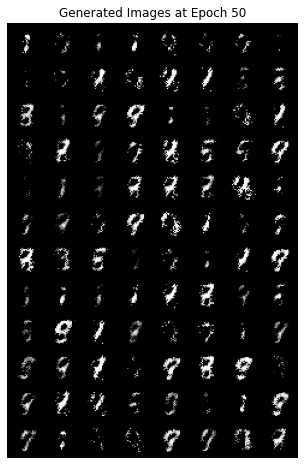

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 50 of 100
Generator loss: 2.55508449, Discriminator loss: 0.58392093


118it [00:38,  3.09it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 51 of 100
Generator loss: 2.69776383, Discriminator loss: 0.50681653


118it [00:39,  3.00it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 52 of 100
Generator loss: 2.79607664, Discriminator loss: 0.53000962


118it [00:43,  2.70it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 53 of 100
Generator loss: 2.83963319, Discriminator loss: 0.51916544


118it [00:41,  2.83it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 54 of 100
Generator loss: 3.10013646, Discriminator loss: 0.52408684


118it [00:36,  3.27it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 55 of 100
Generator loss: 2.85854479, Discriminator loss: 0.55750686


118it [00:35,  3.28it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 56 of 100
Generator loss: 2.62953374, Discriminator loss: 0.67054001


118it [00:35,  3.29it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 57 of 100
Generator loss: 2.78330273, Discriminator loss: 0.61341714


118it [00:36,  3.26it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 58 of 100
Generator loss: 2.74786190, Discriminator loss: 0.58193868


118it [00:36,  3.26it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 59 of 100
Generator loss: 2.93446396, Discriminator loss: 0.51970175


118it [00:35,  3.29it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 60 of 100
Generator loss: 2.67739943, Discriminator loss: 0.57656222


118it [00:36,  3.23it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 61 of 100
Generator loss: 2.90851996, Discriminator loss: 0.51169957


118it [00:36,  3.26it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 62 of 100
Generator loss: 2.96410983, Discriminator loss: 0.55623932


118it [00:36,  3.26it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 63 of 100
Generator loss: 2.69360004, Discriminator loss: 0.56048005


118it [00:36,  3.26it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 64 of 100
Generator loss: 2.71090020, Discriminator loss: 0.56640716


118it [00:35,  3.29it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 65 of 100
Generator loss: 2.80173553, Discriminator loss: 0.55629025


118it [00:36,  3.26it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 66 of 100
Generator loss: 2.58457678, Discriminator loss: 0.58292149


118it [00:35,  3.29it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 67 of 100
Generator loss: 2.49007201, Discriminator loss: 0.65142901


118it [00:36,  3.26it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 68 of 100
Generator loss: 2.62629403, Discriminator loss: 0.57336903


118it [00:36,  3.25it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 69 of 100
Generator loss: 2.50235766, Discriminator loss: 0.59273405


118it [00:43,  2.70it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 70 of 100
Generator loss: 2.48120036, Discriminator loss: 0.61065256


118it [00:43,  2.72it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 71 of 100
Generator loss: 2.56915946, Discriminator loss: 0.61085151


118it [00:42,  2.80it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 72 of 100
Generator loss: 2.43248261, Discriminator loss: 0.62390788


118it [00:39,  2.97it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 73 of 100
Generator loss: 2.43693883, Discriminator loss: 0.65548805


118it [00:38,  3.10it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 74 of 100
Generator loss: 2.55130805, Discriminator loss: 0.64360211


118it [00:38,  3.07it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 75 of 100
Generator loss: 2.51568287, Discriminator loss: 0.63914855


118it [00:38,  3.10it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 76 of 100
Generator loss: 2.25836235, Discriminator loss: 0.68056781


118it [00:38,  3.08it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 77 of 100
Generator loss: 2.41238622, Discriminator loss: 0.64376555


118it [00:38,  3.07it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 78 of 100
Generator loss: 2.44938036, Discriminator loss: 0.62557479


118it [00:38,  3.05it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 79 of 100
Generator loss: 2.44822912, Discriminator loss: 0.63588356


118it [00:38,  3.05it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 80 of 100
Generator loss: 2.38256458, Discriminator loss: 0.61622750


118it [00:38,  3.10it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 81 of 100
Generator loss: 2.36487554, Discriminator loss: 0.63658447


118it [00:40,  2.91it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 82 of 100
Generator loss: 2.16840438, Discriminator loss: 0.70713243


118it [00:38,  3.08it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 83 of 100
Generator loss: 2.27624946, Discriminator loss: 0.67031052


118it [00:42,  2.76it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 84 of 100
Generator loss: 2.35032216, Discriminator loss: 0.67824960


118it [00:43,  2.69it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 85 of 100
Generator loss: 2.39705145, Discriminator loss: 0.66046824


118it [00:38,  3.03it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 86 of 100
Generator loss: 2.33255481, Discriminator loss: 0.64887773


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 87 of 100
Generator loss: 2.22123118, Discriminator loss: 0.70091859


118it [00:38,  3.09it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 88 of 100
Generator loss: 2.22953883, Discriminator loss: 0.70214499


118it [00:38,  3.05it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 89 of 100
Generator loss: 2.21171893, Discriminator loss: 0.74634141


118it [00:38,  3.09it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 90 of 100
Generator loss: 2.27623726, Discriminator loss: 0.72314214


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 91 of 100
Generator loss: 2.07878310, Discriminator loss: 0.76032342


118it [00:38,  3.09it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 92 of 100
Generator loss: 2.21802765, Discriminator loss: 0.73810458


118it [00:47,  2.48it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 93 of 100
Generator loss: 2.01467280, Discriminator loss: 0.76620077


118it [00:43,  2.69it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 94 of 100
Generator loss: 2.10525694, Discriminator loss: 0.73699807


118it [00:38,  3.08it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 95 of 100
Generator loss: 2.20575598, Discriminator loss: 0.73140726


118it [00:38,  3.10it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 96 of 100
Generator loss: 2.13733492, Discriminator loss: 0.73992518


118it [00:37,  3.12it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 97 of 100
Generator loss: 2.11892354, Discriminator loss: 0.73734226


118it [00:38,  3.10it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 98 of 100
Generator loss: 2.02329743, Discriminator loss: 0.78845911


118it [00:37,  3.11it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 99 of 100
Generator loss: 2.04406762, Discriminator loss: 0.78866280


118it [00:37,  3.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


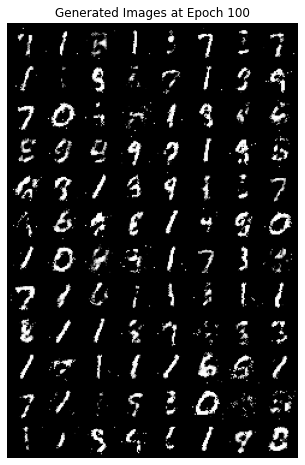

Epoch 100 of 100
Generator loss: 2.04134199, Discriminator loss: 0.75828846


In [138]:
torch.manual_seed(7777)

def generator_loss(fake):
    
    return -torch.mean(torch.log(fake))
    
def discriminator_loss(fake, real):

    loss_real = -torch.mean(torch.log(real))
    loss_fake = -torch.mean(torch.log(1.0 - fake))
    return loss_real + loss_fake

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0

    ### Properly unpacking the tuple, unlike the original code ;)
    for bi, (reals_, _) in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):

        ### Discriminator step

        reals_ = reals_.to(device)
        
        batch_size_ = reals_.size(0)

        optim_d.zero_grad()

        ### Real data 
        #real_labels = label_real(batch_size_)
        output_r = discriminator(reals_)

        ### Fake data, sampled from p(z) by generator class
        ### Detaching because GPT-4 told me so while bugfixing
        noise = create_noise(batch_size_, nz)
        fakes = generator(noise).detach()
        #fake_labels = label_fake(batch_size_)
        output_f = discriminator(fakes)

        loss_d_ = discriminator_loss(output_f, output_r)

        ### Update step
        loss_d_.backward()
        optim_d.step()
        
        loss_d += loss_d_.item()

        ### Generator tries to fool the discriminator, setting the labels to real
        ### -not- Generating new noise (Do I need to, or can I use previously generated noise?)
        optim_g.zero_grad()
        noise = create_noise(batch_size_, nz)
        fakes = generator(noise)

        output_f_g = discriminator(fakes)


        loss_g_ = generator_loss(output_f_g)

        loss_g_.backward()

        optim_g.step()

        loss_g += loss_g_.item()
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) == 1 or (epoch + 1) == 5 or (epoch + 1) == 50 or (epoch + 1) == 100:
        plt.figure(figsize=(8,8))
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'Generated Images at Epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [147]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [148]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

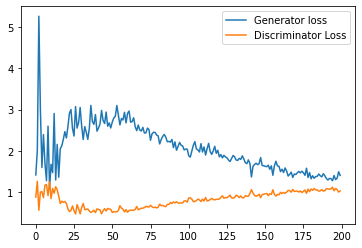

In [149]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')

In [142]:
### Implementing the method for part b
#Previous optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

118it [00:36,  3.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


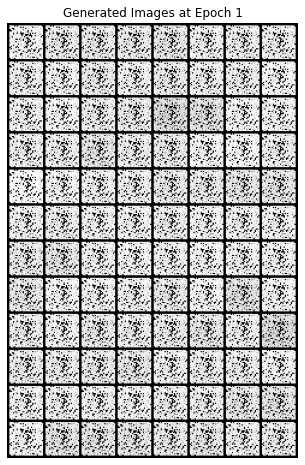

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 1 of 100
Generator loss: 0.05536900, Discriminator loss: 0.08120742


118it [00:40,  2.91it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 2 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:39,  3.00it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 3 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:43,  2.73it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 4 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


 65%|██████▍   | 76/117 [00:31<00:16,  2.45it/s]

In [164]:
torch.manual_seed(7777)

def generator_loss(fake):
    epsilon = 1e-8  
    return -torch.mean(torch.log(1-fake + epsilon))
    
def discriminator_loss(fake, real):
    epsilon = 1e-8  
    loss_real = -torch.mean(torch.log(real + epsilon))
    loss_fake = -torch.mean(torch.log(1.0 - fake + epsilon))
    return loss_real + loss_fake

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0

    ### Properly unpacking the tuple, unlike the original code ;)
    for bi, (reals_, _) in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):

        ### Discriminator step

        reals_ = reals_.to(device)
        
        batch_size_ = reals_.size(0)

        optim_d.zero_grad()

        ### Real data 
        #real_labels = label_real(batch_size_)
        output_r = discriminator(reals_)

        ### Fake data, sampled from p(z) by generator class
        ### Detaching because GPT-4 told me so while bugfixing
        noise = create_noise(batch_size_, nz)
        fakes = generator(noise).detach()
        #fake_labels = label_fake(batch_size_)
        output_f = discriminator(fakes)

        ### Using the given equation
        loss_d_ = discriminator_loss(output_f, output_r)

        ### Update step
        loss_d_.backward()
        torch.nn.utils.clip_grad_norm_(generator.parameters(), max_norm=1)
        torch.nn.utils.clip_grad_norm_(discriminator.parameters(), max_norm=1)
        optim_d.step()
        
        loss_d += loss_d_.item()

        ### Generator tries to fool the discriminator, setting the labels to real
        ### -not- Generating new noise (Do I need to, or can I use previously generated noise?)
        optim_g.zero_grad()
        noise = create_noise(batch_size_, nz)
        fakes = generator(noise)

        output_f_g = discriminator(fakes)


        loss_g_ = generator_loss(output_f_g)

        loss_g_.backward()
        torch.nn.utils.clip_grad_norm_(generator.parameters(), max_norm=1)
        torch.nn.utils.clip_grad_norm_(discriminator.parameters(), max_norm=1)
        optim_g.step()

        loss_g += loss_g_.item()
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) == 1 or (epoch + 1) == 5 or (epoch + 1) == 50 or (epoch + 1) == 100:
        plt.figure(figsize=(8,8))
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'Generated Images at Epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [144]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')


DONE TRAINING


In [145]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images_p1b.gif', imgs)

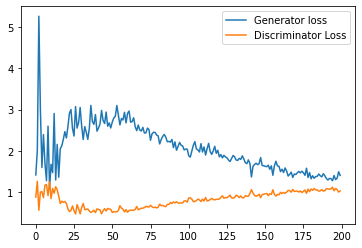

In [146]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss_p1b.png')